In [ ]:
import numpy as np
import pandas as pd
import os
import re
import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Practice module NLP/PLP Practice Module')

Mounted at /content/gdrive


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


# Load Data

In [ ]:
raw_tweets = pd.read_csv('tweets_output_generic_clean.csv')

In [ ]:
raw_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             5755 non-null   int64 
 1   Unnamed: 0.1           5755 non-null   int64 
 2   text                   5755 non-null   object
 3   username               5755 non-null   object
 4   favourite_count        5755 non-null   int64 
 5   retweet_count          5755 non-null   int64 
 6   created_at             5755 non-null   object
 7   place                  45 non-null     object
 8   text_without_URLS      5755 non-null   object
 9   text_without_mentions  5755 non-null   object
 10  sentiments             3899 non-null   object
 11  Unnamed: 11            43 non-null     object
dtypes: int64(4), object(8)
memory usage: 539.7+ KB


In [ ]:
raw_tweets.head()

,Unnamed: 0,Unnamed: 0.1,text,username,favourite_count,retweet_count,created_at,place,text_without_URLS,text_without_mentions,sentiments,Unnamed: 11
0,0,0,@JasonCutter11 @Kathmandu1214 @NicoleeIreland @joeregular57 @ImJohnEli Why would I trust anyone who does their own investigations on themselves like the cops do? Would Singapore who's over 80% vaccinated have a ton of breakthrough cases like they're having if the vaccine actually worked? Oh nah? Shouldn't Israel be thriving right now?,LegParade,0,0,16/10/21 23:53,NaN,@JasonCutter11 @Kathmandu1214 @NicoleeIreland @joeregular57 @ImJohnEli Why would I trust anyone who does their own investigations on themselves like the cops do? Would Singapore who's over 80% vaccinated have a ton of breakthrough cases like they're having if the vaccine actually worked? Oh nah? Shouldn't Israel be thriving right now?,Why would I trust anyone who does their own investigations on themselves like the cops do? Would Singapore who's over 80% vaccinated have a ton of breakthrough cases like they're having if the vaccine actually worked? Oh nah? Shouldn't Israel be thriving right now?,-1,NaN
1,1,1,"@COP26\n@hrw @UN #GetOutBolsonaro\nCovid's final inquiry report makes Brazil settle accounts with its history. Bolsonaro and 40 followers, including ministers and close aides, will be indicted for offenses analyzed and compiled by jurists. #Genocide https://t.co/hd2iD1N3zV https://t.co/taDsdgU2O8",WasaczJulio,0,1,16/10/21 23:52,NaN,"@COP26\n@hrw @UN #GetOutBolsonaro\nCovid's final inquiry report makes Brazil settle accounts with its history. Bolsonaro and 40 followers, including ministers and close aides, will be indicted for offenses analyzed and compiled by jurists. #Genocide","#GetOutBolsonaro\nCovid's final inquiry report makes Brazil settle accounts with its history. Bolsonaro and 40 followers, including ministers and close aides, will be indicted for offenses analyzed and compiled by jurists. #Genocide",Not SG,Not SG
2,2,2,Singapore Covid: Airline websites crash as borders set to open https://t.co/EPhhTaqoRF,frontroyalgirl,0,0,16/10/21 23:42,NaN,Singapore Covid: Airline websites crash as borders set to open,Singapore Covid: Airline websites crash as borders set to open,0,NaN
3,3,3,"â€œGiven low estimated positive rate among fully vaccinated returnees, large number of local cases &amp; increasing vaccine coverage, potential impact on transmission &amp; disease burden is minimal. Stranded Aussies have been casualties of our zero COVID pursuitâ€ https://t.co/OFjFctdgfm",dvglasgow,0,0,16/10/21 23:39,NaN,"â€œGiven low estimated positive rate among fully vaccinated returnees, large number of local cases &amp; increasing vaccine coverage, potential impact on transmission &amp; disease burden is minimal. Stranded Aussies have been casualties of our zero COVID pursuitâ€","â€œGiven low estimated positive rate among fully vaccinated returnees, large number of local cases &amp; increasing vaccine coverage, potential impact on transmission &amp; disease burden is minimal. Stranded Aussies have been casualties of our zero COVID pursuitâ€",Not SG,Not SG
4,4,4,"@Kstampin @KellyFait55 @Kingscroft1 @BrianTh68131915 @realalimah @GVDBossche Whoâ€™s dying? The more they vax the higher the cases/deaths. Your TV lies to you, data doesnâ€™t. Exploding UK, Ireland, Gilbraltor, Israel, South Korea, Singapore cases is why Nordic countries removed all mandates. US doesnâ€™t lead in covid treatment protocol or effective results. https://t.co/pc5X4S561j",cg_sands4,2,0,16/10/21 23:39,NaN,"@Kstampin @KellyFait55 @Kingscroft1 @BrianTh68131915 @realalimah @GVDBossche Whoâ€™s dying? The more they vax the higher the cases/deaths. Your TV lies to you, data doesnâ€™t. Exploding UK, Ireland, Gilbraltor, Israel, South Korea, Singapore cases is why Nordic countries removed all mandates. US doesnâ€™t lead in covid treatment protocol or effective results.","Whoâ€™s dying? The more they vax the higher the cases/deaths. Your TV lies to you, d

In [ ]:
!pip install emot
!pip install emoji

     |████████████████████████████████| 61 kB 15 kB/s 
     |████████████████████████████████| 170 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=80157736a94593641f9c4dc117afa436b98a6dc6f0a44e8c3aae613e00139a05
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [ ]:
import emoji

# Preprocessing

## Remove links, @users, punctuations, numbers (via user defined function)

In [ ]:
def text_cleaning(text):
    text = text.lower()
    text = re.sub("@[A-Za-z0-9_]+"," ", text)
    text = re.sub("#[A-Za-z0-9_]+"," ", text)
    text = re.sub(r'([a-zA-Z0-9._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9._-]+)', "", text)
    text = re.sub(r'(https|http|ftp)://([\w_]+(?:(?:\.[\w_-]+))[\w_.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', "", text)
    text = emoji.demojize(text)
    text = re.sub('RT', " ", text)
    text = re.sub('\n', " ", text)     
    text = re.sub('\t', " ", text)
    text = " ".join(text.split())

    return text

In [ ]:
# Remove multiple space
raw_tweets['clean_text'] = raw_tweets['text'].apply(text_cleaning)

In [ ]:
tweets = raw_tweets
tweets.head(20)

,Unnamed: 0,Unnamed: 0.1,text,username,favourite_count,retweet_count,created_at,place,text_without_URLS,text_without_mentions,sentiments,Unnamed: 11,clean_text
0,0,0,@JasonCutter11 @Kathmandu1214 @NicoleeIreland @joeregular57 @ImJohnEli Why would I trust anyone who does their own investigations on themselves like the cops do? Would Singapore who's over 80% vaccinated have a ton of breakthrough cases like they're having if the vaccine actually worked? Oh nah? Shouldn't Israel be thriving right now?,LegParade,0,0,16/10/21 23:53,NaN,@JasonCutter11 @Kathmandu1214 @NicoleeIreland @joeregular57 @ImJohnEli Why would I trust anyone who does their own investigations on themselves like the cops do? Would Singapore who's over 80% vaccinated have a ton of breakthrough cases like they're having if the vaccine actually worked? Oh nah? Shouldn't Israel be thriving right now?,Why would I trust anyone who does their own investigations on themselves like the cops do? Would Singapore who's over 80% vaccinated have a ton of breakthrough cases like they're having if the vaccine actually worked? Oh nah? Shouldn't Israel be thriving right now?,-1,NaN,why would i trust anyone who does their own investigations on themselves like the cops do? would singapore who's over 80% vaccinated have a ton of breakthrough cases like they're having if the vaccine actually worked? oh nah? shouldn't israel be thriving right now?
1,1,1,"@COP26\n@hrw @UN #GetOutBolsonaro\nCovid's final inquiry report makes Brazil settle accounts with its history. Bolsonaro and 40 followers, including ministers and close aides, will be indicted for offenses analyzed and compiled by jurists. #Genocide https://t.co/hd2iD1N3zV https://t.co/taDsdgU2O8",WasaczJulio,0,1,16/10/21 23:52,NaN,"@COP26\n@hrw @UN #GetOutBolsonaro\nCovid's final inquiry report makes Brazil settle accounts with its history. Bolsonaro and 40 followers, including ministers and close aides, will be indicted for offenses analyzed and compiled by jurists. #Genocide","#GetOutBolsonaro\nCovid's final inquiry report makes Brazil settle accounts with its history. Bolsonaro and 40 followers, including ministers and close aides, will be indicted for offenses analyzed and compiled by jurists. #Genocide",Not SG,Not SG,"covid's final inquiry report makes brazil settle accounts with its history. bolsonaro and 40 followers, including ministers and close aides, will be indicted for offenses analyzed and compiled by jurists."
2,2,2,Singapore Covid: Airline websites crash as borders set to open https://t.co/EPhhTaqoRF,frontroyalgirl,0,0,16/10/21 23:42,NaN,Singapore Covid: Airline websites crash as borders set to open,Singapore Covid: Airline websites crash as borders set to open,0,NaN,singapore covid: airline websites crash as borders set to open
3,3,3,"â€œGiven low estimated positive rate among fully vaccinated returnees, large number of local cases &amp; increasing vaccine coverage, potential impact on transmission &amp; disease burden is minimal. Stranded Aussies have been casualties of our zero COVID pursuitâ€ https://t.co/OFjFctdgfm",dvglasgow,0,0,16/10/21 23:39,NaN,"â€œGiven low estimated positive rate among fully vaccinated returnees, large number of local cases &amp; increasing vaccine coverage, potential impact on transmission &amp; disease burden is minimal. Stranded Aussies have been casualties of our zero COVID pursuitâ€","â€œGiven low estimated positive rate among fully vaccinated returnees, large number of local cases &amp; increasing vaccine coverage, potential impact on transmission &amp; disease burden is minimal. Stranded Aussies have been casualties of our zero COVID pursuitâ€",Not SG,Not SG,"â€œgiven low estimated positive rate among fully vaccinated returnees, large number of local cases &amp; increasing vaccine coverage, potential impact on transmission &amp; disease burden is minimal. stranded aussies have been casualties of our zero covid pursuitâ€"
4,4,4,"@Kstampin @KellyFait55 @Kingscroft1 @BrianTh68131915 

# Sampling data

In [ ]:
tweets2 = tweets[(tweets['sentiments'] == "-1")|(tweets['sentiments']=="1")][['sentiments', 'clean_text']]
tweets2['sentiments'].value_counts()

-1    837
1     304
Name: sentiments, dtype: int64

In [ ]:
# choosing 300 samples from each sentiment
tweets_pos = tweets2[tweets2['sentiments'] == '1'].sample(300)
tweets_neg = tweets2[tweets2['sentiments'] == '-1'].sample(300)

tweets2 = tweets_pos.append(tweets_neg).sample(frac = 1)
tweets2.head()

,sentiments,clean_text
362,-1,we are talking about vaccine effectiveness against hospitalizations and death and you show data on case loads in singapore and au. why do such mental gymnastics to prove that vaccines donâ€:trade_mark:t help keep people alive and greatly decrease chances of hospitalization when clearly do?
917,1,"currently working overseas in sg, : over the last 28 days, of the 61,274 infected cases here in singapore, 98.5 percent had no or mild symptoms due to the vaccine made by americans! only 0.2 percent had died due to underlying conditions, age &amp; unvaccinated!*80%vaccinated"
1606,-1,"singapore is over 80% vaccinated and cases are sky rocketing there, so instead of deepthroating nbc , how about open your eyes and look at the results of this vaccine campaign which hasnâ€:trade_mark:t stopped covid at all"
2079,1,have a look at singapore. heavily vaccinated large number of daily covid cases with minimal hospitalised. itâ€:trade_mark:s the only way forward.
1051,1,the approach in singapore seems sensible. little need for pcr.


In [ ]:
tweets2['sentiments'].value_counts()

1     300
-1    300
Name: sentiments, dtype: int64

In [ ]:
#tweets2.to_csv('tweets2class.csv')

# Train Word Embedding

##CBOW

In [ ]:
!pip install keras
!pip install tensorflow
!pip install plot_keras_history
!pip install seaborn

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8793 sha256=5a68554043a903292203248b928b742c49f602b23601b40769f426c9abc2008e
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7877 sha256=88bbf5cfe3d7cedd89f94aad79ba9d4e22467b0db622737e6318222995ce73c3
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4585 sha256=d69be8fc92087be737aed02a1d82d2fa87daa8e9da35028ee42a9a15011f80c7
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [ ]:
from keras.utils import np_utils
from keras.preprocessing import text
from keras.preprocessing import sequence
from keras.layers import InputLayer, Activation, merge, Concatenate,Input
import keras.backend as K
from keras.models import Sequential
from keras.layers.embeddings import Embedding

from keras.layers import Dense, Embedding, Lambda, Reshape
from keras.layers import Input
from keras.models import Model
from keras.layers import dot
from tensorflow.keras.activations import relu
from nltk import word_tokenize, sent_tokenize
from gensim.corpora.dictionary import Dictionary
import numpy as np

from keras.preprocessing.sequence import skipgrams
import gensim

In [ ]:
# using nltk tokenizer.  
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
X=tweets['clean_text']

In [ ]:
#Tokenize text
# tokenized_sent = [sent_tokenize(doc) for doc in X]
tokenized_text = [word_tokenize(word) for word in X]

#Create Vocab as a Dictionary
vocab = Dictionary(tokenized_text)
print(dict(vocab.items()))

sent0 = tokenized_text[0]
print(vocab.doc2idx(sent0))

vocab.add_documents([['PAD']])
dict(vocab.items())
print(vocab.token2id['PAD'])

corpusByWordID = list()
for sent in  tokenized_text:
    corpusByWordID.append(vocab.doc2idx(sent))

vocab_size = len(vocab)
embed_size = 100
hidden_dim=100
window_size = 2 # context window size

print('Vocabulary Size:', vocab_size) 
print('Vocabulary Sample:', list(vocab.items())[:10])

{0: '%', 1: "'re", 2: "'s", 3: '80', 4: '?', 5: 'a', 6: 'actually', 7: 'anyone', 8: 'be', 9: 'breakthrough', 10: 'cases', 11: 'cops', 12: 'do', 13: 'does', 14: 'have', 15: 'having', 16: 'i', 17: 'if', 18: 'investigations', 19: 'israel', 20: 'like', 21: "n't", 22: 'nah', 23: 'now', 24: 'of', 25: 'oh', 26: 'on', 27: 'over', 28: 'own', 29: 'right', 30: 'should', 31: 'singapore', 32: 'the', 33: 'their', 34: 'themselves', 35: 'they', 36: 'thriving', 37: 'ton', 38: 'trust', 39: 'vaccinated', 40: 'vaccine', 41: 'who', 42: 'why', 43: 'worked', 44: 'would', 45: ',', 46: '.', 47: '40', 48: 'accounts', 49: 'aides', 50: 'analyzed', 51: 'and', 52: 'bolsonaro', 53: 'brazil', 54: 'by', 55: 'close', 56: 'compiled', 57: 'covid', 58: 'final', 59: 'followers', 60: 'for', 61: 'history', 62: 'including', 63: 'indicted', 64: 'inquiry', 65: 'its', 66: 'jurists', 67: 'makes', 68: 'ministers', 69: 'offenses', 70: 'report', 71: 'settle', 72: 'will', 73: 'with', 74: ':', 75: 'airline', 76: 'as', 77: 'borders', 7

In [ ]:
# Create CBOW Training data
def generate_cbow_context_word_pairs(corpusByID, window_size, vocab_size):
    context_length = window_size*2
    X=[]
    Y=[]
    for sent in corpusByID:
        sentence_length = len(sent)
        for index, word in enumerate(sent):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([sent[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)
            if start<0:
                x = sequence.pad_sequences(context_words, maxlen=context_length,padding='pre',value=vocab.token2id['PAD'])
                y = np_utils.to_categorical(label_word, vocab_size)
                X.append(x)
                Y.append(y)
                continue
            if end>=sentence_length:
                x = sequence.pad_sequences(context_words, maxlen=context_length,padding='post',value=vocab.token2id['PAD'])
                y = np_utils.to_categorical(label_word, vocab_size)
                X.append(x)
                Y.append(y)
                continue
            else:
                X.append(sequence.pad_sequences(context_words, maxlen=context_length))
                y = np_utils.to_categorical(label_word, vocab_size)
                Y.append(y)
                continue
           
    return X,Y
            


X,Y = generate_cbow_context_word_pairs(corpusByWordID, window_size, vocab_size) 
   
for x, y in zip(X,Y):
    print('Context (X):', [vocab[w] for w in x[0]], '-> Target (Y):', vocab[np.argwhere(y[0])[0][0]])


Streaming output truncated to the last 5000 lines.
Context (X): ['PAD', 'this', 'vax', 'youâ€'] -> Target (Y): the
Context (X): ['this', 'the', 'youâ€', ':'] -> Target (Y): vax
Context (X): ['the', 'vax', ':', 'trade_mark'] -> Target (Y): youâ€
Context (X): ['vax', 'youâ€', 'trade_mark', ':'] -> Target (Y): :
Context (X): ['youâ€', ':', ':', 're'] -> Target (Y): trade_mark
Context (X): [':', 'trade_mark', 're', 'talking'] -> Target (Y): :
Context (X): ['trade_mark', ':', 'talking', 'about'] -> Target (Y): re
Context (X): [':', 're', 'about', '?'] -> Target (Y): talking
Context (X): ['re', 'talking', '?', 'PAD'] -> Target (Y): about
Context (X): ['talking', 'about', 'PAD', 'PAD'] -> Target (Y): ?
Context (X): ['PAD', 'PAD', 'lost', 'their'] -> Target (Y): teachers
Context (X): ['PAD', 'teachers', 'their', 'job'] -> Target (Y): lost
Context (X): ['teachers', 'lost', 'job', 'for'] -> Target (Y): their
Context (X): ['lost', 'their', 'for', 'not'] -> Target (Y): job
Context (X): ['their', '

In [ ]:
# Define cbow architecture
cbow = Sequential()

cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: relu(K.mean(x, axis=1)), output_shape=(embed_size,)))
#either sigmoid or softmax
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='sgd')
cbow.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            1264900   
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense (Dense)               (None, 12649)             1277549   
                                                                 
Total params: 2,542,449
Trainable params: 2,542,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model

for epoch in range(15):
    loss = 0.
    for x, y in zip(X,Y):
        loss += cbow.train_on_batch(x, y)
    print(epoch, loss)

In [ ]:
## Save the wordvectors
f = open('Cbow_vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = cbow.get_weights()[0]
for key in vocab:
    str_vec = ' '.join(map(str, list(vectors[key, :])))
    f.write('{} {}\n'.format(vocab[key], str_vec))
f.close()

##Skipgram

In [ ]:
#Create Skipgram Training data 

# generate skip-grams with both positive and negative examples
skip_grams = [skipgrams(sent, vocabulary_size=vocab_size, window_size=2) for sent in corpusByWordID]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
        vocab[pairs[i][0]], pairs[i][0],           
        vocab[pairs[i][1]], pairs[i][1], 
        labels[i]))

(israel (19), n't (21)) -> 1
(on (26), own (28)) -> 1
(oh (25), *thai (8610)) -> 0
(like (20), numerous (8188)) -> 0
(if (17), 67 (2365)) -> 0
(? (4), 8â (11196)) -> 0
(cops (11), contributing (3920)) -> 0
(nah (22), should (30)) -> 1
(who (41), over (27)) -> 1
('s (2), removed (133)) -> 0


In [ ]:
# build skip-gram architecture

input_word = Input((1,))
input_context_word = Input((1,))
#W1
word_embedding    = Embedding(input_dim=vocab_size, 
                              output_dim=embed_size,
                              input_length=1,
                              name='word_embedding')

#W2
context_embedding = Embedding(input_dim=vocab_size, 
                              output_dim=embed_size,
                              input_length=1,
                              name='context_embedding')

word_embedding = word_embedding(input_word)
word_embedding_layer = Reshape((embed_size, 1))(word_embedding)

context_embedding = context_embedding(input_context_word)
context_embedding_layer = Reshape((embed_size, 1))(context_embedding)

# now perform the dot product operation  
dot_product = dot([word_embedding_layer, context_embedding_layer], axes=1)
dot_product = Reshape((1,))(dot_product)

# add the sigmoid output layer
outputLayer = Dense(1, activation='sigmoid')(dot_product)

model = Model(inputs=[input_word, input_context_word], outputs=outputLayer)
model.compile(loss='binary_crossentropy', optimizer='adam')

# view model summary
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 word_embedding (Embedding)     (None, 1, 100)       1264900     ['input_1[0][0]']                
                                                                                                  
 context_embedding (Embedding)  (None, 1, 100)       1264900     ['input_2[0][0]']                
                                                                                              

In [ ]:
#train the model

for epoch in range(1,16):
    loss = 0
    for i, elem in enumerate(skip_grams):
        if len(elem[0]) == 0:
            continue
        pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [pair_first_elem, pair_second_elem]
        Y = labels
        if i % 100 == 0:
            print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
        loss += model.train_on_batch(X,Y)  

    print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Processed 100 (skip_first, skip_second, relevance) pairs
Processed 200 (skip_first, skip_second, relevance) pairs
Processed 300 (skip_first, skip_second, relevance) pairs
Processed 400 (skip_first, skip_second, relevance) pairs
Processed 500 (skip_first, skip_second, relevance) pairs
Processed 600 (skip_first, skip_second, relevance) pairs
Processed 700 (skip_first, skip_second, relevance) pairs
Processed 800 (skip_first, skip_second, relevance) pairs
Processed 900 (skip_first, skip_second, relevance) pairs
Processed 1000 (skip_first, skip_second, relevance) pairs
Processed 1100 (skip_first, skip_second, relevance) pairs
Processed 1200 (skip_first, skip_second, relevance) pairs
Processed 1300 (skip_first, skip_second, relevance) pairs
Processed 1400 (skip_first, skip_second, relevance) pairs
Processed 1500 (skip_first, skip_second, relevance) pairs
Processed 1600 (skip_first, skip_second, relevance) pairs
Processed 1700 (skip_first

In [ ]:
#get the embeding matrix
weights = model.get_weights()
## Save the wordvectors
f = open('skipgram_vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for key in vocab:
    str_vec = ' '.join(map(str, list(vectors[key, :])))
    f.write('{} {}\n'.format(vocab[key], str_vec))
f.close()

# Data Prep for Model Building

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#from sklearn.externals 
import joblib
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from gensim.models.word2vec import Word2Vec 
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedShuffleSplit
import sklearn
import nltk
import re 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import precision_score, recall_score,f1_score

In [ ]:
path = "tweets2class.csv"
tweets2 = pd.read_csv(path)

In [ ]:
y=tweets2['sentiments']
X=tweets2['clean_text']

In [ ]:
# MeanEmbeddingVectorizer define the way to represent docs using word vectors
#averaging 100 columns 
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        if len(word2vec)>0:
            self.dim=len(word2vec[next(iter(glove_twitter))])
            #self.dim=len(word2vec["and"])
        else:
            self.dim=0
            
    def fit(self, X, y):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
# Prepare word embeddings from GLOVE
import numpy as np
GLOVE__TWITTER_27B_100D_PATH ="/content/gdrive/My Drive/Practice module NLP/PLP Practice Module/glove.twitter.27B.100d.txt"
encoding="utf-8"
with open(GLOVE__TWITTER_27B_100D_PATH, "rb") as lines:
    wvec = {line.split()[0].decode(encoding): np.array(line.split()[1:],dtype=np.float32)
               for line in lines}

In [ ]:
tokenized_text = [word_tokenize(word) for word in X]
# tokenized_text

In [ ]:
# reading glove files, this may take a while
# we're reading line by line and only saving vectors
# that correspond to words from our data set
import struct 
from nltk import word_tokenize

glove_twitter = {}
all_words = set(w for words in tokenized_text for w in words) #X is our data, not from 6B
#here, we are only looking at unigram

print(len(all_words))

3620


In [ ]:
with open(GLOVE__TWITTER_27B_100D_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if (word in all_words):
            nums=np.array(parts[1:], dtype=np.float32)
            glove_twitter[word] = nums

In [ ]:
# Prepare word embeddings from w2v_cbow

w2v_cbow_PATH ="/content/gdrive/My Drive/Practice module NLP/PLP Practice Module/Cbow_vectors.txt"
encoding="utf-8"
with open(w2v_cbow_PATH, "rb") as lines:
    wvec = {line.split()[0].decode(encoding): np.array(line.split()[1:],dtype=np.float32)
               for line in lines}

w2v_cbow = {}

with open(w2v_cbow_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if (word in all_words):
            nums=np.array(parts[1:], dtype=np.float32)
            w2v_cbow[word] = nums

In [ ]:
# Prepare word embeddings from w2v_skipgram

w2v_skipgram_PATH ="/content/gdrive/My Drive/Practice module NLP/PLP Practice Module/skipgram_vectors.txt"
encoding="utf-8"
with open(w2v_skipgram_PATH, "rb") as lines:
    wvec = {line.split()[0].decode(encoding): np.array(line.split()[1:],dtype=np.float32)
               for line in lines}

w2v_skipgram = {}

with open(w2v_skipgram_PATH, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if (word in all_words):
            nums=np.array(parts[1:], dtype=np.float32)
            w2v_skipgram[word] = nums

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##Get Features


In [ ]:
#Vectorizer the sentences using Tfidf value
#Make sure test data should be transformed using vectorizer learned from training data 
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=1)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

print(train_vectors.shape)
print(test_vectors.shape)

(420, 12510)
(180, 12510)


In [ ]:
#get the Kbest feature from Ngrams
ch21 = SelectKBest(chi2, k=600)
train_Kbest = ch21.fit_transform(train_vectors, y_train)
test_Kbest = ch21.transform(test_vectors)
print(train_Kbest.shape)
print(test_Kbest.shape)
train_Kbest = train_Kbest.toarray()
test_Kbest = test_Kbest.toarray()

(420, 600)
(180, 600)


In [ ]:
#define the embedding
w2v_cbow_Embedding = MeanEmbeddingVectorizer(w2v_cbow)
w2v_skipgram_Embedding = MeanEmbeddingVectorizer(w2v_skipgram)
glove_Embedding = MeanEmbeddingVectorizer(glove_twitter)

In [ ]:
#grab cbow features
X_cbow_train = w2v_cbow_Embedding.transform(X_train)
print(X_cbow_train.shape)

X_cbow_test = w2v_cbow_Embedding.transform(X_test)
print(X_cbow_test.shape)

(420, 100)
(180, 100)


In [ ]:
#grab skipgram features
X_skipgram_train = w2v_skipgram_Embedding.transform(X_train)
print(X_skipgram_train.shape)

X_skipgram_test = w2v_skipgram_Embedding.transform(X_test)
print(X_skipgram_test.shape)

(420, 100)
(180, 100)


In [ ]:
#grab glove feature
X_glove_train = glove_Embedding.transform(X_train)
print(X_glove_train.shape)

X_glove_test = glove_Embedding.transform(X_test)
print(X_glove_test.shape)

(420, 100)
(180, 100)


In [ ]:
#combine the feature set
final_train = np.c_[X_cbow_train,X_skipgram_train,X_glove_train, train_Kbest]
print(final_train.shape)

final_test = np.c_[X_cbow_test,X_skipgram_test,X_glove_test, test_Kbest]
print(final_test.shape)

(420, 900)
(180, 900)


# CPU Method

##Logistic Regression

In [ ]:
model_ME = LogisticRegression(random_state=1, solver='lbfgs',max_iter=1000).fit(final_train, y_train)
#model on trainset
predME_train = model_ME.predict(final_train)
pred = list(predME_train)
print(metrics.confusion_matrix(y_train, pred))
print(np.mean(predME_train == y_train))
print(metrics.classification_report(y_train, pred))

[[136  64]
 [ 29 191]]
0.7785714285714286
              precision    recall  f1-score   support

          -1       0.82      0.68      0.75       200
           1       0.75      0.87      0.80       220

    accuracy                           0.78       420
   macro avg       0.79      0.77      0.77       420
weighted avg       0.78      0.78      0.78       420



In [ ]:
predME_test = model_ME.predict(final_test)
pred = list(predME_test)
print(metrics.confusion_matrix(y_test, pred))
print(np.mean(predME_test == y_test))
print(metrics.classification_report(y_test, pred))

[[48 52]
 [17 63]]
0.6166666666666667
              precision    recall  f1-score   support

          -1       0.74      0.48      0.58       100
           1       0.55      0.79      0.65        80

    accuracy                           0.62       180
   macro avg       0.64      0.63      0.61       180
weighted avg       0.65      0.62      0.61       180



##SVM

In [ ]:
from sklearn import svm, datasets
from sklearn.svm import LinearSVC
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
model_svm = LinearSVC(C=0.1)
sv = model_svm.fit(final_train, y_train)
#model on trainset
predSVM_train = model_svm.predict(final_train)
pred = list(predSVM_train)
print(metrics.confusion_matrix(y_train, pred))
print(np.mean(predSVM_train == y_train))
print(metrics.classification_report(y_train, pred))

[[129  71]
 [ 32 188]]
0.7547619047619047
              precision    recall  f1-score   support

          -1       0.80      0.65      0.71       200
           1       0.73      0.85      0.78       220

    accuracy                           0.75       420
   macro avg       0.76      0.75      0.75       420
weighted avg       0.76      0.75      0.75       420



In [ ]:
predSVM_test = model_svm.predict(final_test)
pred = list(predSVM_test)
print(metrics.confusion_matrix(y_test, pred))
print(np.mean(predSVM_test == y_test))
print(metrics.classification_report(y_test, pred))

[[45 55]
 [18 62]]
0.5944444444444444
              precision    recall  f1-score   support

          -1       0.71      0.45      0.55       100
           1       0.53      0.78      0.63        80

    accuracy                           0.59       180
   macro avg       0.62      0.61      0.59       180
weighted avg       0.63      0.59      0.59       180



#Save models

In [ ]:
 import pickle
# save the Log Reg model to disk
filename = 'modelME_2class.sav'
pickle.dump(model_ME, open(filename, 'wb'))

In [ ]:
import pickle
# save the RBF model to disk
filename = 'model_svm.sav'
pickle.dump(model_svm, open(filename, 'wb'))

#DNN Method

## LSTM (CBOW)

The codes on training the Bi-LSTM are adapted from TPML Day 2 Workshop.

In [61]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 15 21:39:26 2020

@author: isswan
"""
from __future__ import print_function
import numpy as np

import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import pandas as pd
from keras.preprocessing.text import Tokenizer, one_hot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from plot_keras_history import plot_history

In [62]:
# tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
text_train = tokenizer.texts_to_sequences(X_train)
text_test = tokenizer.texts_to_sequences(X_test)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embed_size = 100
maxlen = 100

In [63]:
# Add padding
text_train = pad_sequences(text_train, maxlen = maxlen, padding = 'post')
text_test = pad_sequences(text_test, maxlen = maxlen, padding = 'post')

In [64]:
# Prepare embedding matrix from CBOW
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))

for word, i in word_index.items():
    embedding_vector = w2v_cbow.get(word)
    if embedding_vector is not None:
        # words not found in w2v_cbow will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Check % words with embeddings 
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)   

0.9484500174155347


In [65]:
##onehot encoding for y
def categoricalList2Onehot(listOfClasses):
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(listOfClasses)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    
    return onehot_encoded

y_train_onehot = categoricalList2Onehot(y_train)
y_train_onehot.shape
y_test_onehot = categoricalList2Onehot(y_test)
y_test_onehot.shape

(180, 2)

In [66]:
#Define the BiLSTM model with dropout (using CBOW)
##############################################
model_cbow = Sequential()
model_cbow.add(Embedding(vocab_size, 
                         embed_size, 
                         input_length=maxlen,
                         weights=[embedding_matrix],
                         trainable=False))
#model_cbow.add(Bidirectional(LSTM(64, return_sequences=True)))
model_cbow.add(Bidirectional(LSTM(64)))
#output Dropout
model_cbow.add(Dropout(0.6))
model_cbow.add(Dense(2, activation='softmax'))

# try using different optimizers and different optimizer configs
model_cbow.compile(optimizer = tf.keras.optimizers.SGD(), 
                          loss = tf.keras.losses.CategoricalCrossentropy(), 
                          metrics= ['accuracy'])
model_cbow.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          287100    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 371,838
Trainable params: 84,738
Non-trainable params: 287,100
_________________________________________________________________


Train...
Epoch 1/300
7/7 [==============================] - 5s 220ms/step - loss: 0.7128 - accuracy: 0.5071 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/300
7/7 [==============================] - 0s 67ms/step - loss: 0.7009 - accuracy: 0.5452 - val_loss: 0.6943 - val_accuracy: 0.5389
Epoch 3/300
7/7 [==============================] - 0s 57ms/step - loss: 0.7005 - accuracy: 0.5333 - val_loss: 0.6948 - val_accuracy: 0.5389
Epoch 4/300
7/7 [==============================] - 0s 56ms/step - loss: 0.7065 - accuracy: 0.5048 - val_loss: 0.6938 - val_accuracy: 0.5389
Epoch 5/300
7/7 [==============================] - 0s 55ms/step - loss: 0.7039 - accuracy: 0.5167 - val_loss: 0.6946 - val_accuracy: 0.5222
Epoch 6/300
7/7 [==============================] - 0s 58ms/step - loss: 0.6926 - accuracy: 0.5238 - val_loss: 0.6943 - val_accuracy: 0.5278
Epoch 7/300
7/7 [==============================] - 0s 56ms/step - loss: 0.6965 - accuracy: 0.5262 - val_loss: 0.6935 - val_accuracy: 0.5278
Epoch 8/30

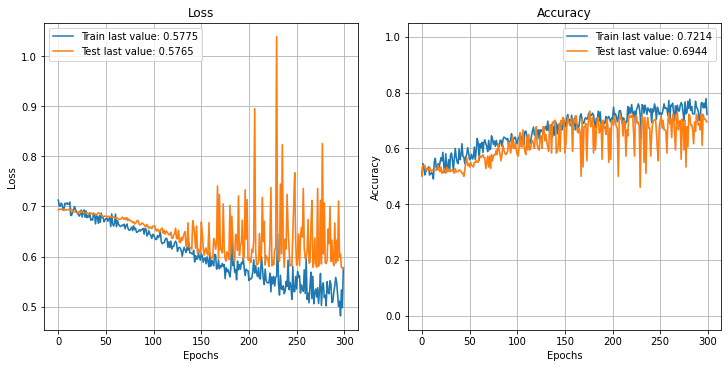

In [ ]:
#Train the model
batch_size = 64

checkpoint_filepath = '/content/gdrive/My Drive/Practice module NLP/PLP Practice Module/checkpoint/checkpoint_cbow'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

print('Train...')

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
hist_cbow = model_cbow.fit(text_train, y_train_onehot,
                           batch_size=batch_size,
                           epochs=300,
                           validation_data= (text_test, y_test_onehot), 
                           callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
model_cbow.load_weights(checkpoint_filepath)

loss, accuracy = model_cbow.evaluate(text_train, y_train_onehot, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_cbow.evaluate(text_test, y_test_onehot, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
plot_history(hist_cbow.history);

## LSTM (Skipgram)

In [67]:
# Prepare embedding matrix from Skipgram
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))

for word, i in word_index.items():
    embedding_vector = w2v_skipgram.get(word)
    if embedding_vector is not None:
        # words not found in w2v_skipgram will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Check % words with embeddings 
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)   

0.9484500174155347


In [68]:
#Define the BiLSTM model (using Skipgram)
##############################################
model_skipgram= Sequential()
model_skipgram.add(Embedding(vocab_size, 
                             embed_size, 
                             input_length = maxlen,
                             weights=[embedding_matrix],
                             trainable=False))
model_skipgram.add(Bidirectional(LSTM(64)))
#output Dropout
model_skipgram.add(Dropout(0.6))
model_skipgram.add(Dense(2, activation='softmax'))

# try using different optimizers and different optimizer configs
model_skipgram.compile('SGD', 'categorical_crossentropy', metrics=['accuracy'])
model_skipgram.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          287100    
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 371,838
Trainable params: 84,738
Non-trainable params: 287,100
_________________________________________________________________


Train...
Epoch 1/300
7/7 [==============================] - 5s 223ms/step - loss: 0.7428 - accuracy: 0.4500 - val_loss: 0.6956 - val_accuracy: 0.5667
Epoch 2/300
7/7 [==============================] - 0s 57ms/step - loss: 0.7289 - accuracy: 0.4810 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 3/300
7/7 [==============================] - 0s 56ms/step - loss: 0.7293 - accuracy: 0.5190 - val_loss: 0.6991 - val_accuracy: 0.4833
Epoch 4/300
7/7 [==============================] - 0s 57ms/step - loss: 0.7194 - accuracy: 0.4690 - val_loss: 0.7004 - val_accuracy: 0.4722
Epoch 5/300
7/7 [==============================] - 0s 57ms/step - loss: 0.7128 - accuracy: 0.4714 - val_loss: 0.7031 - val_accuracy: 0.4111
Epoch 6/300
7/7 [==============================] - 0s 56ms/step - loss: 0.7276 - accuracy: 0.4833 - val_loss: 0.7059 - val_accuracy: 0.4167
Epoch 7/300
7/7 [==============================] - 0s 57ms/step - loss: 0.7155 - accuracy: 0.4857 - val_loss: 0.7040 - val_accuracy: 0.4222
Epoch 8/30

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fb20a5fd0>,
       dtype=object))

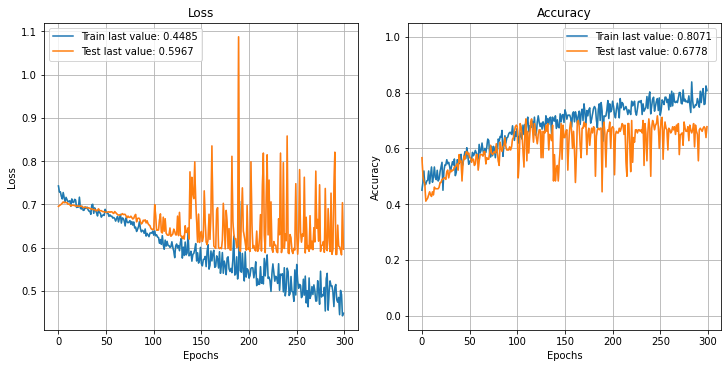

In [ ]:
#Train the model
batch_size = 64

checkpoint_filepath = '/content/gdrive/My Drive/Practice module NLP/PLP Practice Module/checkpoint/checkpoint_skipgram'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

print('Train...')

hist_skipgram = model_skipgram.fit(text_train, y_train_onehot,
                                   batch_size=batch_size,
                                   epochs=300,
                                   validation_data=(text_test, y_test_onehot), 
                           callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
model_skipgram.load_weights(checkpoint_filepath)

loss, accuracy = model_skipgram.evaluate(text_train, y_train_onehot, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_skipgram.evaluate(text_test, y_test_onehot, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
plot_history(hist_skipgram)

## LSTM (GLOVE)

In [ ]:
# Prepare embedding matrix from GLOVE
embedding_matrix = np.zeros((len(word_index)+1, embed_size))

for word, i in word_index.items():
    embedding_vector = glove_twitter.get(word)
    if embedding_vector is not None:
        # words not found in glove_twitter will be all-zeros.
        embedding_matrix[i] = embedding_vector

# Check % words with embeddings 
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)   

0.8460466736328806


In [ ]:
#Define the BiLSTM model with dropout (using GLOVE)
##############################################
model_glove = Sequential()
model_glove.add(Embedding(vocab_size, 
                          embed_size, 
                          input_length=maxlen, 
                          weights=[embedding_matrix],
                          trainable=False))
model_glove.add(Bidirectional(LSTM(64)))
#output Dropout
model_glove.add(Dropout(0.6))
model_glove.add(Dense(2, activation='softmax'))

# try using different optimizers and different optimizer configs
model_glove.compile('SGD', 'categorical_crossentropy', metrics=['accuracy'])
model_glove.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          287100    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 371,838
Trainable params: 84,738
Non-trainable params: 287,100
_________________________________________________________________


Train...
Epoch 1/300
7/7 [==============================] - 4s 205ms/step - loss: 0.7278 - accuracy: 0.4738 - val_loss: 0.6932 - val_accuracy: 0.5444
Epoch 2/300
7/7 [==============================] - 0s 54ms/step - loss: 0.7098 - accuracy: 0.4952 - val_loss: 0.6950 - val_accuracy: 0.5389
Epoch 3/300
7/7 [==============================] - 0s 55ms/step - loss: 0.7088 - accuracy: 0.5048 - val_loss: 0.6971 - val_accuracy: 0.5056
Epoch 4/300
7/7 [==============================] - 0s 54ms/step - loss: 0.6826 - accuracy: 0.5524 - val_loss: 0.6969 - val_accuracy: 0.5056
Epoch 5/300
7/7 [==============================] - 0s 56ms/step - loss: 0.6930 - accuracy: 0.5333 - val_loss: 0.6949 - val_accuracy: 0.5222
Epoch 6/300
7/7 [==============================] - 0s 54ms/step - loss: 0.7130 - accuracy: 0.4881 - val_loss: 0.6936 - val_accuracy: 0.5444
Epoch 7/300
7/7 [==============================] - 0s 54ms/step - loss: 0.6982 - accuracy: 0.5262 - val_loss: 0.6963 - val_accuracy: 0.4944
Epoch 8/30

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0346569dd0>,
       dtype=object))

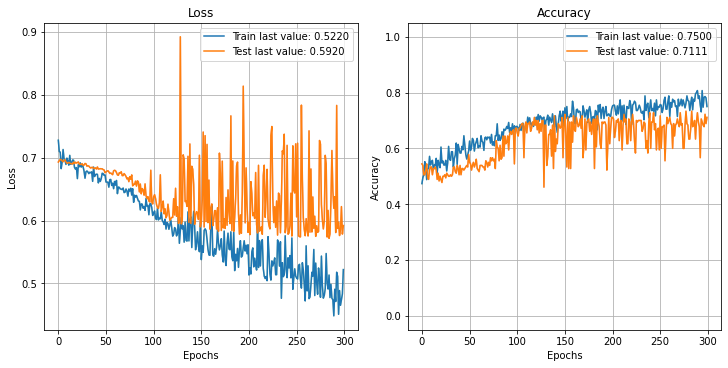

In [ ]:
#Train the model
batch_size = 64

checkpoint_filepath = '/content/gdrive/My Drive/Practice module NLP/PLP Practice Module/checkpoint/checkpoint_glove'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

print('Train...')
hist_glove = model_glove.fit(text_train, y_train_onehot,
                             batch_size=batch_size,
                             epochs=300,
                             validation_data=(text_test, y_test_onehot), 
                             callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
model_glove.load_weights(checkpoint_filepath)

loss, accuracy = model_glove.evaluate(text_train, y_train_onehot, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_glove.evaluate(text_test, y_test_onehot, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
plot_history(hist_glove)

# Load LSTM models

In [69]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [70]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
text_train = tokenizer.texts_to_sequences(X_train)

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embed_size = 100
maxlen = 100

def embedding_matrix(word_index, w2v):
    matrix = np.zeros((len(word_index) + 1, 100))

    for word, i in word_index.items():
        embedding_vector = w2v.get(word)
        if embedding_vector is not None:
            # words not found in w2v_cbow will be all-zeros.
            matrix[i] = embedding_vector
    
    return matrix


def BiLSTM_model(embedding_matrix):
    model = Sequential()
    model.add(Embedding(vocab_size, 
                        embed_size, 
                        input_length=maxlen,
                        weights=[embedding_matrix],
                        trainable=False))
    #model_cbow.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    #output Dropout
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    return model

In [71]:
# Glove token embedding
w2v_glove_PATH = "/content/gdrive/MyDrive/Practice module NLP/PLP Practice Module/glove.twitter.27B.100d.txt"
w2v_cbow_PATH = "/content/gdrive/MyDrive/Practice module NLP/PLP Practice Module/Cbow_vectors.txt"
w2v_skipgram_PATH = "/content/gdrive/MyDrive/Practice module NLP/PLP Practice Module/skipgram_vectors.txt"

encoding="utf-8"

with open(w2v_glove_PATH, "rb") as lines:
    wvec_glove = {line.split()[0].decode(encoding): np.array(line.split()[1:],dtype=np.float32)
               for line in lines}
    
with open(w2v_cbow_PATH, "rb") as lines:
    wvec_cbow = {line.split()[0].decode(encoding): np.array(line.split()[1:],dtype=np.float32)
               for line in lines}

with open(w2v_skipgram_PATH, "rb") as lines:
    wvec_skipgram = {line.split()[0].decode(encoding): np.array(line.split()[1:],dtype=np.float32)
               for line in lines}

def SentenceEmbed(word2vec):
    return np.mean(list(word2vec.values()), axis = 0)

In [72]:
glove_embed = embedding_matrix(word_index, wvec_glove)
cbow_embed = embedding_matrix(word_index, wvec_cbow)
skipgram_embed = embedding_matrix(word_index, wvec_skipgram)

model_cbow = BiLSTM_model(cbow_embed)
model_skipgram = BiLSTM_model(skipgram_embed)
model_glove = BiLSTM_model(glove_embed)

model_cbow.load_weights('/content/gdrive/MyDrive/Practice module NLP/PLP Practice Module/checkpoint/checkpoint_cbow')
model_skipgram.load_weights('/content/gdrive/MyDrive/Practice module NLP/PLP Practice Module/checkpoint/checkpoint_skipgram')
model_glove.load_weights('/content/gdrive/MyDrive/Practice module NLP/PLP Practice Module/checkpoint/checkpoint_glove')

In [73]:
userinput = input('Enter text: ')
text = tokenizer.texts_to_sequences([userinput])
text_test = pad_sequences(text, maxlen = maxlen, padding = 'post')
print(np.argmax(model_cbow.predict(text_test)))
print(np.argmax(model_skipgram.predict(text_test)))
print(np.argmax(model_glove.predict(text_test)))

Enter text: this is good
1
1
1
